In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://drive.google.com/uc?id=1yvlEUDSwA29hfniaFZSSK-IphhDiiRJn')

In [4]:
data.shape

(2000, 7)

In [5]:
data.head(3)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [7]:
data.nunique()

,0
Number_of_Customers_Per_Day,441
Average_Order_Value,694
Operating_Hours_Per_Day,12
Number_of_Employees,13
Marketing_Spend_Per_Day,1967
Location_Foot_Traffic,831
Daily_Revenue,1998


In [8]:
# Count the number of duplicates if any
num_duplicates = data.duplicated().sum()
print(f"\nTotal number of duplicate rows: {num_duplicates}")



Total number of duplicate rows: 0


In [9]:
#statistical values
data.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [10]:
#find median values for all columns as well, to compare with the mean

median_values = data.median()
median_df = pd.DataFrame(median_values, columns=['Median'])
median_df


,Median
Number_of_Customers_Per_Day,275.000
Average_Order_Value,6.300
Operating_Hours_Per_Day,12.000
Number_of_Employees,8.000
Marketing_Spend_Per_Day,250.995
Location_Foot_Traffic,540.000
Daily_Revenue,1770.775


From the general statistics of the data few points seem interesting:

1. Daily_revenue min value is -58.95 dollars, which seems to be an error.
2. Outliers in revenue are possible as the mean value is 1917.3 dollars and median is 1770.775 dollars, and the max is 5114.6 dollars, which can skew the data if kept unchecked.
3. Marketing spendicure also has a wide range from minimum 10.12 dollars to a maximum of 499.74 dollars.

In [11]:
data[data['Daily_Revenue'] == -58.95] # We should drop this row based on the revenue value shown here

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
1751,66,3.64,9,2,16.26,497,-58.95


In [17]:
# Dropping the row

data = data.drop(data[data['Daily_Revenue'] == -58.95].index)
data.shape


(1999, 7)

I think we can replace it with a positive value.

In [12]:
#finding the correlation
data.corr()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
Number_of_Customers_Per_Day,1.000000,-0.014647,0.000122,0.000346,0.027184,-0.000880,0.736461
Average_Order_Value,-0.014647,1.000000,-0.017125,0.011484,0.018782,0.018151,0.535694
Operating_Hours_Per_Day,0.000122,-0.017125,1.000000,-0.030451,0.019247,0.014422,-0.005323
Number_of_Employees,0.000346,0.011484,-0.030451,1.000000,0.026535,-0.041881,0.003295
Marketing_Spend_Per_Day,0.027184,0.018782,0.019247,0.026535,1.000000,-0.012562,0.254812
Location_Foot_Traffic,-0.000880,0.018151,0.014422,-0.041881,-0.012562,1.000000,0.013469
Daily_Revenue,0.736461,0.535694,-0.005323,0.003295,0.254812,0.013469,1.000000


Not much correlation seen except for between Number of customers and revenue, which is obvious. Also a slight correlation between marketting and revenue.




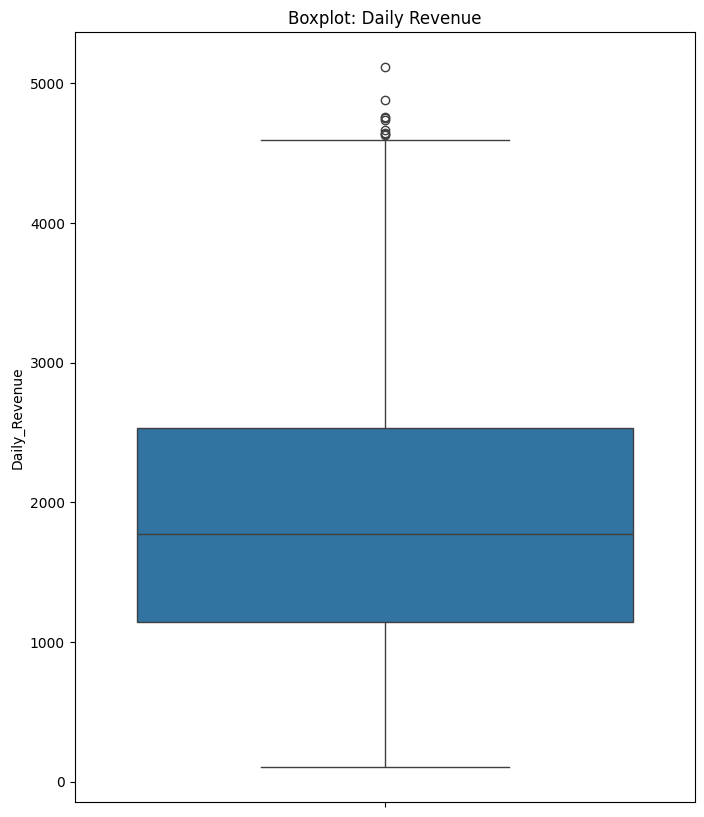

In [18]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=data['Daily_Revenue'])
plt.title("Boxplot: Daily Revenue")
plt.show()

In [19]:
data[data['Daily_Revenue'] > 4500]

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
40,495,9.49,17,3,133.89,933,4550.30
66,416,9.98,17,10,483.07,576,4737.16
85,451,9.88,15,14,493.23,879,4750.98
369,447,9.67,11,13,373.58,530,4525.30
441,409,9.91,11,4,493.42,527,4591.74
543,445,9.42,9,5,322.73,290,4587.33
557,434,9.74,17,14,359.67,283,4587.04
629,466,9.19,12,10,484.53,182,4529.09
701,494,9.57,13,8,385.76,686,4646.33
746,450,9.94,16,13,327.28,700,4532.39


Looks like there are a few outliers for daily revenue, but the number suggests there can be a way to explore them rather than dropping the values.

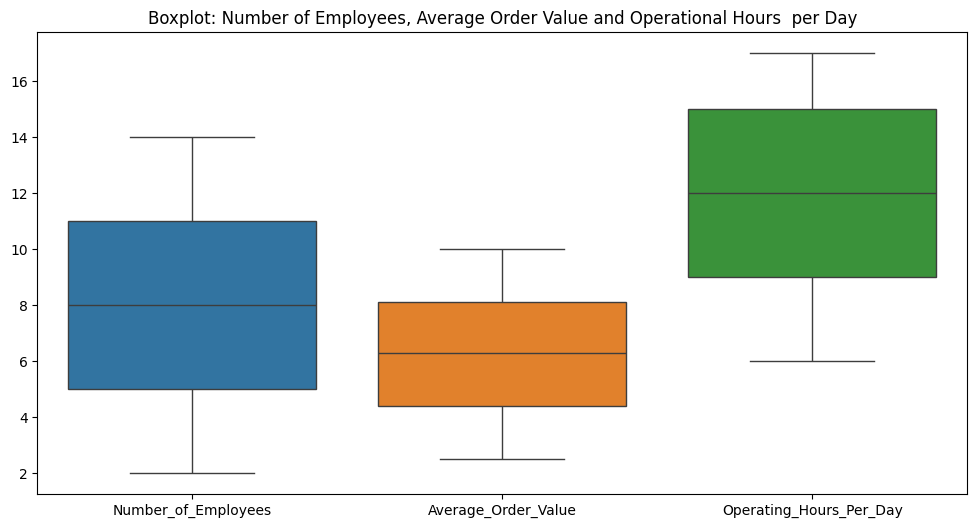

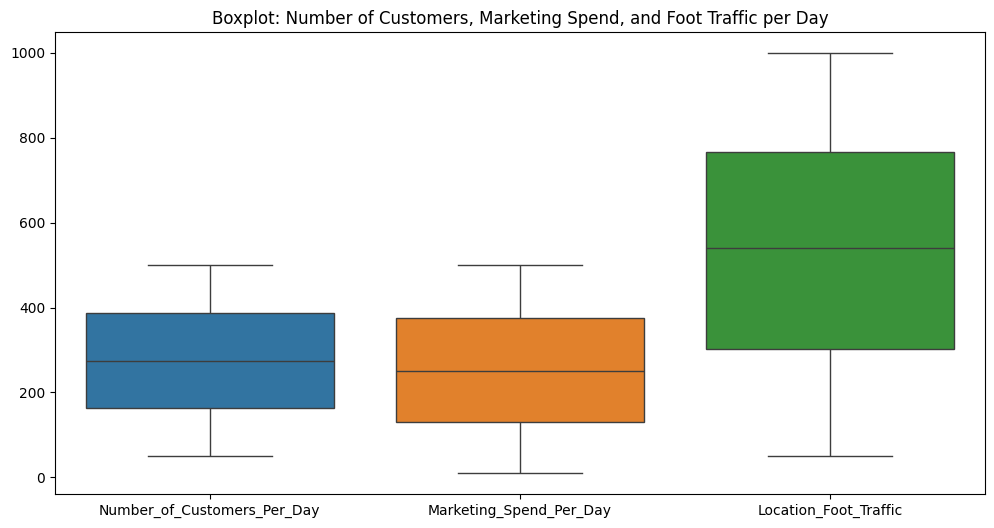

In [20]:
#Box plot of all the other features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Number_of_Employees', 'Average_Order_Value','Operating_Hours_Per_Day' ]])
plt.title("Boxplot: Number of Employees, Average Order Value and Operational Hours  per Day")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Number_of_Customers_Per_Day', 'Marketing_Spend_Per_Day', 'Location_Foot_Traffic']])
plt.title("Boxplot: Number of Customers, Marketing Spend, and Foot Traffic per Day")
plt.show()

A clear correlation between customers per day and revenue (obvious).

What we can work with is creating more columns during feature engineering proces(or now for EDA) regarding the "Revenue per Customer", "Marketing Efficiency" or "Local foot traffic per day and revenue"

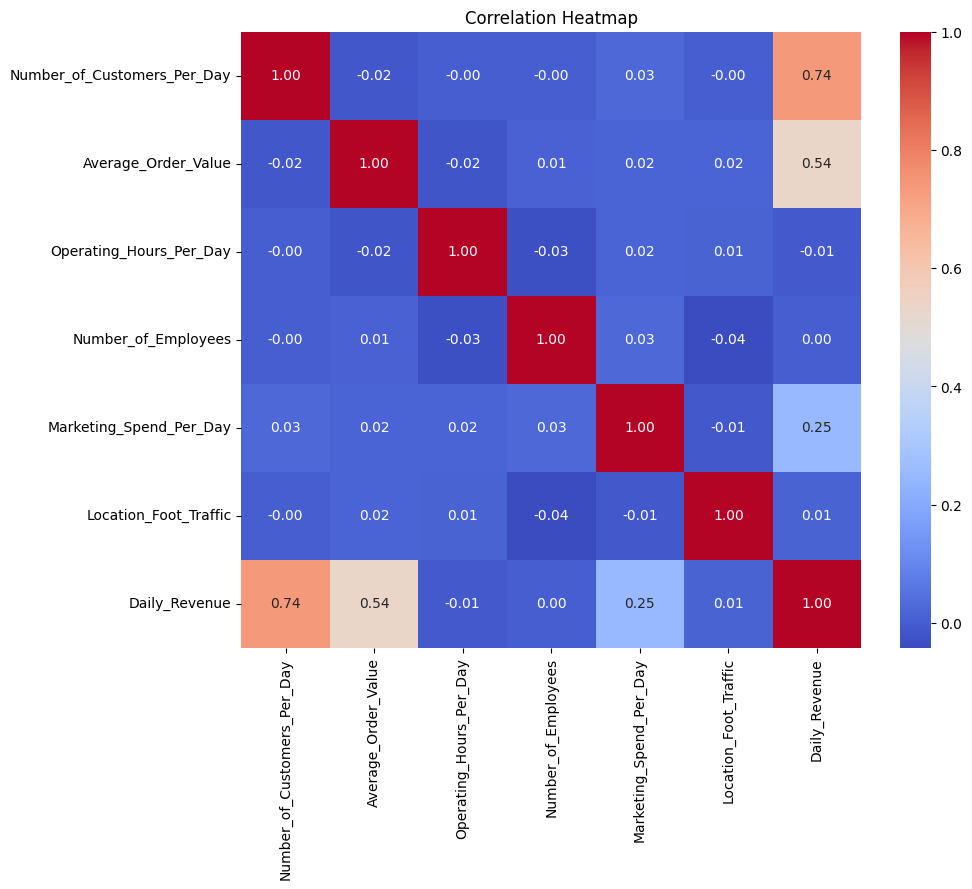

In [23]:
# Heatmap to see the correlation between various features

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


There is a high correlation between the number of customers per day, Average order value and revenue, which is obvious. The other feature that can be explored is Marketing Spend per day.

**Saving the wrangles dataset for further work**

In [25]:
data.to_csv('coffeeshop_revenue_wrangled.csv', index=False)